IMPORTAZIONE LIBRERIE

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
import array 
import scipy.signal as signal
#Processing libraries
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import seaborn as sns
from scipy.stats import zscore
from sklearn.multiclass import OneVsRestClassifier

# Model libraries
from sklearn.linear_model import LogisticRegression, SGDClassifier, Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE

# Testing libraries
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, learning_curve
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix, classification_report, roc_curve, auc

# remove warnings
import warnings
warnings.filterwarnings('ignore')

CAMBIO PATH PER ANALISI RISPETTO AL LOG DI VOLO CONSIDERAT

In [2]:
path_file = os.path.abspath(os.getcwd())
print(path_file)
os.chdir(path_file)

c:\Users\chiar\OneDrive\Desktop\MantenzionePreventiva\ProgettoManutenzionePreventiva


ARRAY CHE CONTERRA' I DATAFRAME DI CIASCUN VOLO (PER UN TOTALE DI 18)

In [3]:
data_path = os.path.join(path_file,'*.csv') #lista di tutti gli elementi di estensione csv nella cartella path
csv_list = glob.glob(data_path) #converte data path in un output Unix-like (ls) (*.csv -> lista di elementi con estensione csv)
dataframe_collection = []
df_1 = pd.DataFrame()

# ciclo per scorrere tutti i csv
for csv_file in csv_list: # ciclo che scorre i csv nella cartella path
    df = pd.read_csv(csv_file) 
    #df = df.to_numpy()
    #df = df.to_records(index=False)
    #dataframe_collection.append(df)
    df_1 = df_1.append(df,ignore_index=True)
    #print(df)

# ciclo per scorrere tutti i csv
for csv_file in csv_list: # ciclo che scorre i csv nella cartella path
    df = pd.read_csv(csv_file) 
    #df = df.to_numpy()
    df = df.to_records(index=False)
    dataframe_collection.append(df)

#prova = pd.DataFrame(dataframe_collection)


In [4]:
df_1=df_1.drop_duplicates()
print(df_1)

      tempo  <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  \
0       0.0 -0.032100   0.017081   -0.399284   0.134398         78.0   
1       1.0 -0.032346   0.017054   -0.400010   0.134356        102.0   
2       2.0 -0.032590   0.017026   -0.400594   0.134314         98.0   
3       3.0 -0.032832   0.016999   -0.401113   0.134271        102.0   
4       4.0 -0.033265   0.017017   -0.412325   0.134447        102.0   
...     ...       ...        ...         ...        ...          ...   
1344   62.0 -0.048472   0.006254   -0.082119   0.092673          0.0   
1345   63.0 -0.048289   0.006253   -0.081993   0.092571          0.0   
1346   64.0 -0.048212   0.006240   -0.075446   0.092463          0.0   
1347   65.0 -0.048179   0.006225   -0.068067   0.092367          0.0   
1348   66.0 -0.048194   0.006211   -0.061448   0.092295          0.0   

      freq2(GyrX)  amp1(GyrX)  amp2(GyrX)  <>(GyrY)  ...    amp2(C13)  \
0            96.0    3.596543    3.414090 -0.014483  ...  1316

In [5]:
df_1 = df_1.sample(frac=1).reset_index(drop=True)
print(df_1)

      tempo  <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  \
0      52.0 -0.128844   0.032350   -0.697915   0.221066          0.0   
1      35.0 -0.026784   0.009838    2.268397   0.102617         68.0   
2       5.0 -0.019804   0.009851    2.533029   0.101070         53.0   
3      46.0  0.011258   0.049799    2.666583   0.223160         81.0   
4      45.0 -0.131820   0.032364   -0.707492   0.222843          0.0   
...     ...       ...        ...         ...        ...          ...   
1344   31.0 -0.028168   0.019818   -0.119729   0.143387        103.0   
1345   68.0 -0.047956   0.016110   -0.478736   0.135540        100.0   
1346   33.0 -0.061988   0.011566    0.319221   0.124010          0.0   
1347   33.0 -0.054908   0.006056   -0.018837   0.095158          0.0   
1348   45.0 -0.018844   0.018290    3.633357   0.136378          0.0   

      freq2(GyrX)  amp1(GyrX)  amp2(GyrX)  <>(GyrY)  ...    amp2(C13)  \
0           118.0   23.648233    4.427297 -0.000383  ...  1647

In [6]:
df_1 = df_1.drop(['tempo'], axis=1)
print(df_1)

      <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  freq2(GyrX)  \
0    -0.128844   0.032350   -0.697915   0.221066          0.0        118.0   
1    -0.026784   0.009838    2.268397   0.102617         68.0         92.0   
2    -0.019804   0.009851    2.533029   0.101070         53.0          0.0   
3     0.011258   0.049799    2.666583   0.223160         81.0         78.0   
4    -0.131820   0.032364   -0.707492   0.222843          0.0        116.0   
...        ...        ...         ...        ...          ...          ...   
1344 -0.028168   0.019818   -0.119729   0.143387        103.0         80.0   
1345 -0.047956   0.016110   -0.478736   0.135540        100.0        127.0   
1346 -0.061988   0.011566    0.319221   0.124010          0.0         68.0   
1347 -0.054908   0.006056   -0.018837   0.095158          0.0        110.0   
1348 -0.018844   0.018290    3.633357   0.136378          0.0        105.0   

      amp1(GyrX)  amp2(GyrX)  <>(GyrY)  var(GyrY)  ...    amp2(

### Bilanciamento del dataset

In [7]:
x = df_1.iloc[:,:-1]
y = df_1.iloc[:,-1:]

In [8]:
oversample = SMOTE()
x, y = oversample.fit_resample(x,y)
print(x)

      <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  freq2(GyrX)  \
0    -0.128844   0.032350   -0.697915   0.221066     0.000000   118.000000   
1    -0.026784   0.009838    2.268397   0.102617    68.000000    92.000000   
2    -0.019804   0.009851    2.533029   0.101070    53.000000     0.000000   
3     0.011258   0.049799    2.666583   0.223160    81.000000    78.000000   
4    -0.131820   0.032364   -0.707492   0.222843     0.000000   116.000000   
...        ...        ...         ...        ...          ...          ...   
1618 -0.138640   0.041434   -1.537157   0.246064    75.130091    79.089423   
1619 -0.113745   0.039998   -0.462897   0.229842    52.137936    64.172382   
1620 -0.025120   0.009762    2.377001   0.101821    84.464595    64.464595   
1621  0.001681   0.007156   -0.311708   0.084508     0.000000   115.613327   
1622 -0.120318   0.039213   -0.434972   0.231489    80.837018    59.215865   

      amp1(GyrX)  amp2(GyrX)  <>(GyrY)  var(GyrY)  ...    amp1(

# Selezione feature più importanti

In [9]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif, f_classif, f_regression
fvalue_Best = SelectKBest(score_func=f_classif, k=15)
fit = fvalue_Best.fit(x, y)
print(fit)
print(fvalue_Best.get_support())

SelectKBest(k=15)
[False False False False False False False False  True  True False  True
  True False  True False False False False  True False False False False
  True False False False  True False  True  True  True False  True  True
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False  True  True False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False]


In [10]:
features_score = pd.DataFrame(fit.scores_)
features = pd.DataFrame(x.columns)
feature_score = pd.concat([features,features_score],axis=1)
# Assigning column names
feature_score.columns = ["Input_Features","F_Score"]
print(feature_score.nlargest(60,columns="F_Score"))

    Input_Features     F_Score
28     freq1(AccX)  836.202238
12     freq1(GyrY)  826.200751
34      kurt(AccY)  811.237859
30      amp1(AccX)  677.123724
32        <>(AccY)  669.882474
78        amp1(C9)  633.355591
24        <>(AccX)  623.901647
35       RMS(AccY)  605.635506
8         <>(GyrY)  585.251502
31      amp2(AccX)  557.548937
9        var(GyrY)  483.598400
79        amp2(C9)  481.238818
11       RMS(GyrY)  466.314693
19       RMS(GyrZ)  462.737443
14      amp1(GyrY)  438.787541
17       var(GyrZ)  426.933195
46      amp1(AccZ)  420.788927
41       var(AccZ)  397.596935
111      amp2(C13)  395.525975
6       amp1(GyrX)  386.091375
110      amp1(C13)  369.921264
103      amp2(C12)  362.498695
56       <>(Pitch)  349.996986
81        var(C10)  340.981732
97        var(C12)  333.083160
118      amp1(C14)  322.978065
62     amp1(Pitch)  319.470029
27       RMS(AccX)  295.002788
48        <>(Roll)  293.423669
10      kurt(GyrY)  288.668606
86       amp1(C10)  278.923705
22      

In [11]:
i=0
index_false=[]
for el in list(fvalue_Best.get_support()):
    if not el:
        index_false.append(i)
    i=i+1
print(index_false)

[0, 1, 2, 3, 4, 5, 6, 7, 10, 13, 15, 16, 17, 18, 20, 21, 22, 23, 25, 26, 27, 29, 33, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]


In [12]:
x=x.drop(x.columns[index_false],axis = 1)
print(x)

      <>(GyrY)  var(GyrY)  RMS(GyrY)  freq1(GyrY)  amp1(GyrY)  RMS(GyrZ)  \
0    -0.000383   0.005574   0.074569   112.000000    1.669656   0.162204   
1    -0.008557   0.006183   0.078994   111.000000    6.471797   0.111163   
2    -0.007215   0.006609   0.081501    91.000000    3.607433   0.112447   
3    -0.041492   0.037271   0.197226     0.000000   31.065175   0.218333   
4     0.002014   0.005296   0.072711   111.000000    1.787614   0.163326   
...        ...        ...        ...          ...         ...        ...   
1618  0.028125   0.009050   0.099081    93.284559    5.058728   0.153288   
1619  0.046832   0.010485   0.112469    97.482752    6.499973   0.130523   
1620 -0.008375   0.006247   0.079376   109.821532    5.843549   0.111335   
1621  0.014329   0.005445   0.075083   119.213339    3.666812   0.156059   
1622  0.042538   0.010479   0.110730    98.621153    4.665018   0.127847   

      <>(AccX)  freq1(AccX)  amp1(AccX)  amp2(AccX)  <>(AccY)  kurt(AccY)  \
0    -0.35

### Separazione del dataset in training e test

In [13]:
# Random state
rs = 42

# Split the data to check which algorithms learn better (later on we can check )
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=rs)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# look at the shape of the data (many problems can arise from wrong shape)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1298, 15)
(325, 15)
(1298, 1)
(325, 1)


In [14]:
from sklearn.calibration import CalibratedClassifierCV

# List of classifiers:
classifiers = [
    LogisticRegression(random_state = rs),
    DecisionTreeClassifier(random_state=rs, criterion="entropy",max_depth=1),
    RandomForestClassifier(n_estimators = 1000,max_depth=1, random_state=rs,bootstrap=False),
    #AdaBoostClassifier(n_estimators=1000, random_state= rs),
    SVC(probability=True),
    MLPClassifier(random_state=rs), # Multi Layer Perceptron
    SGDClassifier(random_state=rs) # Stochastic Gradient Descent 
]

# List of results that will occure:
clf_name = [] # names of the classifiers
model_results = pd.DataFrame.copy(y_test) #resulting of prediction from the models

kfold = StratifiedKFold(n_splits=5) #cross-validation
cv_results = [] # scores from cross validation
cv_acc = [] # mean accuracy from cross validation, need to maximize
cv_std = [] # standard deviation from cross validation, need to minimise

cnfm = [] #confusion matrix
clr = [] #classification report
roc_auc = [] #roc curve:
roc_tpr = []
roc_fpr = []

### Classificazione

Cross-Validation: [0.81153846 0.82307692 0.84230769 0.78764479 0.77992278]
Accuracy: 0.79 	 ---> LogisticRegression 


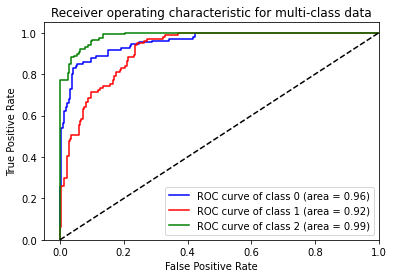

----------------------------------------------------
Cross-Validation: [0.65769231 0.65384615 0.64615385 0.65637066 0.65637066]
Accuracy: 0.69 	 ---> DecisionTreeClassifier 


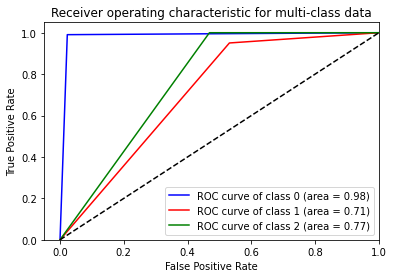

----------------------------------------------------
Cross-Validation: [0.96153846 0.94230769 0.94615385 0.93822394 0.94980695]
Accuracy: 0.96 	 ---> RandomForestClassifier 


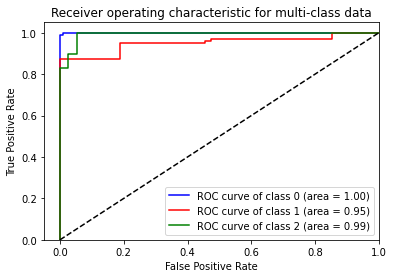

----------------------------------------------------
Cross-Validation: [0.65       0.64230769 0.66153846 0.62548263 0.68725869]
Accuracy: 0.67 	 ---> SVC 


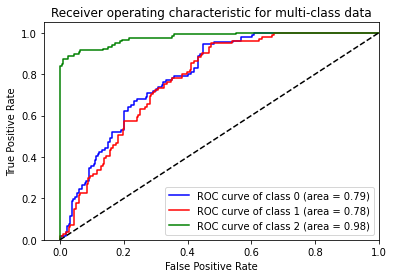

----------------------------------------------------
Cross-Validation: [0.92307692 0.87692308 0.85       0.8957529  0.84942085]
Accuracy: 0.84 	 ---> MLPClassifier 


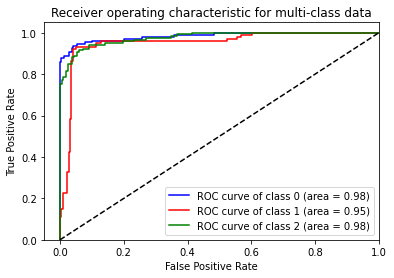

----------------------------------------------------
Cross-Validation: [0.56153846 0.77307692 0.65384615 0.58687259 0.5984556 ]
Accuracy: 0.58 	 ---> SGDClassifier 


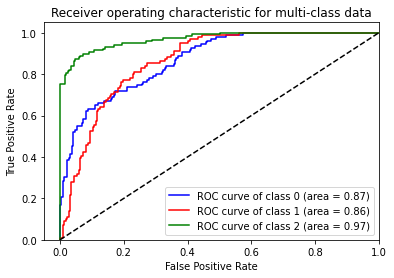

----------------------------------------------------


In [15]:
from itertools import cycle
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer

n_classes = 3

j=0
# Training the algorithms and results
for clf in classifiers:
    name = clf.__class__.__name__
    clf_name.append(name)
    
    
    #fitting and predictions
    model = clf.fit(x_train, y_train.values.ravel())
    y_pred = model.predict(x_test)
    model_results[name] = y_pred
    
    #accuracy and log loss
    cv_results.append(cross_val_score(clf, x_train, y_train.values.ravel(), scoring = "accuracy",cv = kfold)) # qui invece abbiamo cross validation
    acc = round(accuracy_score(y_test.values.ravel(), y_pred), 2) # accuratezza semplice con training e test
    train_pred = clf.predict(x_test)
    print(f'Cross-Validation: {cross_val_score(clf, x_train, y_train.values.ravel(), scoring = "accuracy",cv = kfold)}') 
    
    print(f'Accuracy: {acc} \t ---> {name} ')

    '''guasto_pred = pd.Series(model.predict(df_test), name='Guasto_test')
    conteggio = guasto_pred.value_counts()
    print(f'Test: {conteggio}')  '''  
    
    #confusion matrix, clasification report, roc curve
    cnfm.append(confusion_matrix(y_test.values.ravel(), y_pred))
    clr.append(classification_report(y_test.values.ravel(), y_pred))
    #fpr, tpr, thresholds = roc_curve(y_pred, y_test.values.ravel(), pos_label=1)

    if (j == 1) | (j == 2) | (j == 4):
        y_score = clf.fit(x_train, y_train).predict_proba(x_test)
    else:
        clf = OneVsRestClassifier(clf)
        y_score = clf.fit(x_train, y_train).decision_function(x_test)

    lb = LabelBinarizer()
    y_true_bin = lb.fit_transform(y_test)

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    colors = cycle(['blue', 'red', 'green'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=1.5,
                label='ROC curve of class {0} (area = {1:0.2f})'
                ''.format(i, roc_auc[i]))
    plt.plot([0, 1], [0, 1], 'k--', lw=1.5)
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic for multi-class data')
    plt.legend(loc="lower right")
    plt.show()
    
    j += 1

    print("----------------------------------------------------")

for i in cv_results:
    cv_acc.append(i.mean())
    cv_std.append(i.std())


### Matrici di confusione

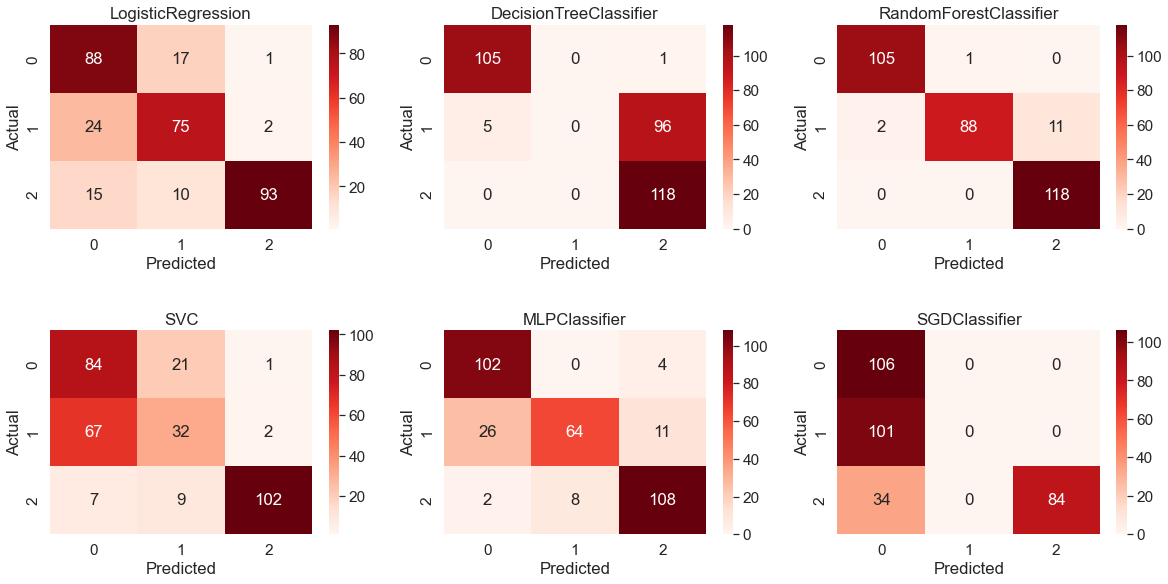

In [16]:
import seaborn as sns
# Confusion matrixes (not-normalized confusion matrix)
plt.figure(figsize=(20,15))
sns.set(font_scale=1.4)
for i in range(len(classifiers)):
    plt.subplot(3,3,i+1) #adjust this acourding to the number of algorithms
    sns.heatmap(cnfm[i], annot=True, fmt="d",cmap="Reds")
    plt.subplots_adjust(hspace = 0.5)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(clf_name[i])

Cross Validation Scores

Text(0.5, 1.0, 'Cross validation scores')

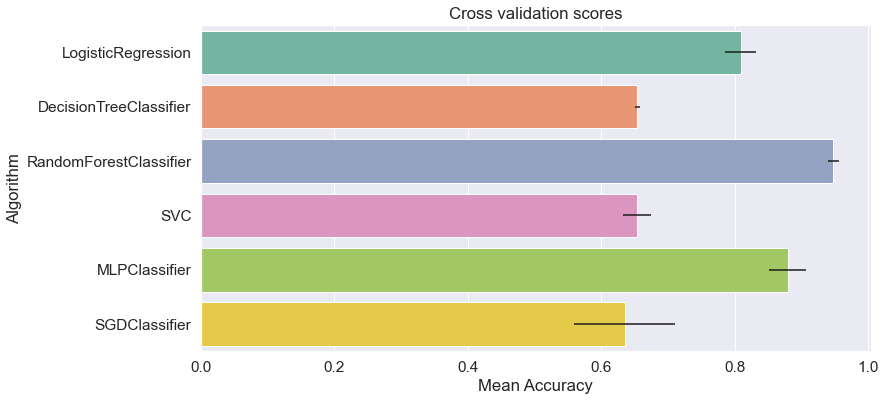

In [17]:
# Cross validation accuracy results graph
cv_res = pd.DataFrame({"CrossValMeans":cv_acc, "CrossValerrors": cv_std,"Algorithm":clf_name})

plt.figure(figsize=(12,6))
sns.barplot(x="CrossValMeans",y="Algorithm",data = cv_res, palette="Set2",orient = "h",**{'xerr':cv_std})
plt.xlabel("Mean Accuracy")
plt.title("Cross validation scores")

Report Classificazione

In [18]:
#Classification reports
for i in range(len(classifiers)):
    print (f"{clf_name[i]} Classification Report:" )
    print (clr[i])

LogisticRegression Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.83      0.76       106
           1       0.74      0.74      0.74       101
           2       0.97      0.79      0.87       118

    accuracy                           0.79       325
   macro avg       0.80      0.79      0.79       325
weighted avg       0.81      0.79      0.79       325

DecisionTreeClassifier Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       106
           1       0.00      0.00      0.00       101
           2       0.55      1.00      0.71       118

    accuracy                           0.69       325
   macro avg       0.50      0.66      0.56       325
weighted avg       0.51      0.69      0.57       325

RandomForestClassifier Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      